# Question 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
from sktime.forecasting.arima import AutoARIMA

In [6]:
data = pd.read_csv('parkingLot.csv')
data

,vehicle_no,timestamp,camera_id
0,MHUN7063,2024-09-12 05:00:00,1
1,MHYN4677,2024-09-12 05:00:00,1
2,MHEL6595,2024-09-12 05:00:00,1
3,MHNQ2590,2024-09-12 05:00:00,1
4,MHHA0518,2024-09-12 05:00:00,1
...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2
106690,MHVY8418,2024-11-14 00:00:00,2
106691,MHSR8102,2024-11-14 00:00:00,2
106692,MHQG5264,2024-11-14 00:00:00,2


In [7]:
# data['vehicle_no'].fillna('Unknown', inplace=True)
data['time'] = pd.to_datetime(data['timestamp'])
# data['date'] = pd.to_datetime(data['timestamp'])
data['date'] = data['time'].dt.date
# if time stamp time is 00 00 then make it's date as previous date
data.loc[data['time'].dt.time == datetime.time(0, 0), 'date'] = data['date'] - pd.Timedelta(days=1)
data

,vehicle_no,timestamp,camera_id,time,date
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13


In [8]:
data['camera_1'] = data['camera_id'] == 1
data['camera_2'] = data['camera_id'] == 2
data['camera_1'] = 1 * data['camera_1']
data['camera_2'] = 1 * data['camera_2']

In [9]:
data

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


In [10]:
timely_data = data.groupby('timestamp').sum(numeric_only=True)
daily_data = data.groupby('date').sum(numeric_only=True)

In [11]:
vehicle_data = data['vehicle_no']

In [12]:
vehicle_data.aggregate('count')

106253

In [13]:
counts = vehicle_data.value_counts()

In [14]:
counts[counts % 2 == 1]

vehicle_no
MHWW1113    3
MHPY2628    3
MHBK0188    3
MHKA6372    3
MHYV2746    3
           ..
MHYR8351    1
MHJQ7161    1
MHOG5853    1
MHCS4375    1
MHDG83S5    1
Name: count, Length: 1471, dtype: int64

In [15]:
sorted = data.sort_values(by='time')

In [16]:
sorted

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
21,MHMY1867,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
20,MHZF8417,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
19,MHFU6425,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
18,MHHB4038,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106675,MHEV1001,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106674,MHGL7893,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106682,MHBB9719,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


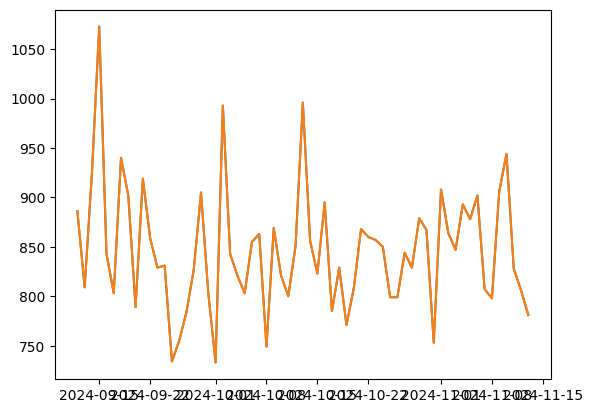

In [17]:
plt.plot(daily_data.index, daily_data['camera_1'], label='Camera 1')
plt.plot(daily_data.index, daily_data['camera_2'], label='Camera 2')

In [18]:
# train an ARIMA model to predict the number of vehicles in the parking lot
# Plot PACF and ACF to determine the order of the ARIMA model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey-Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
           
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

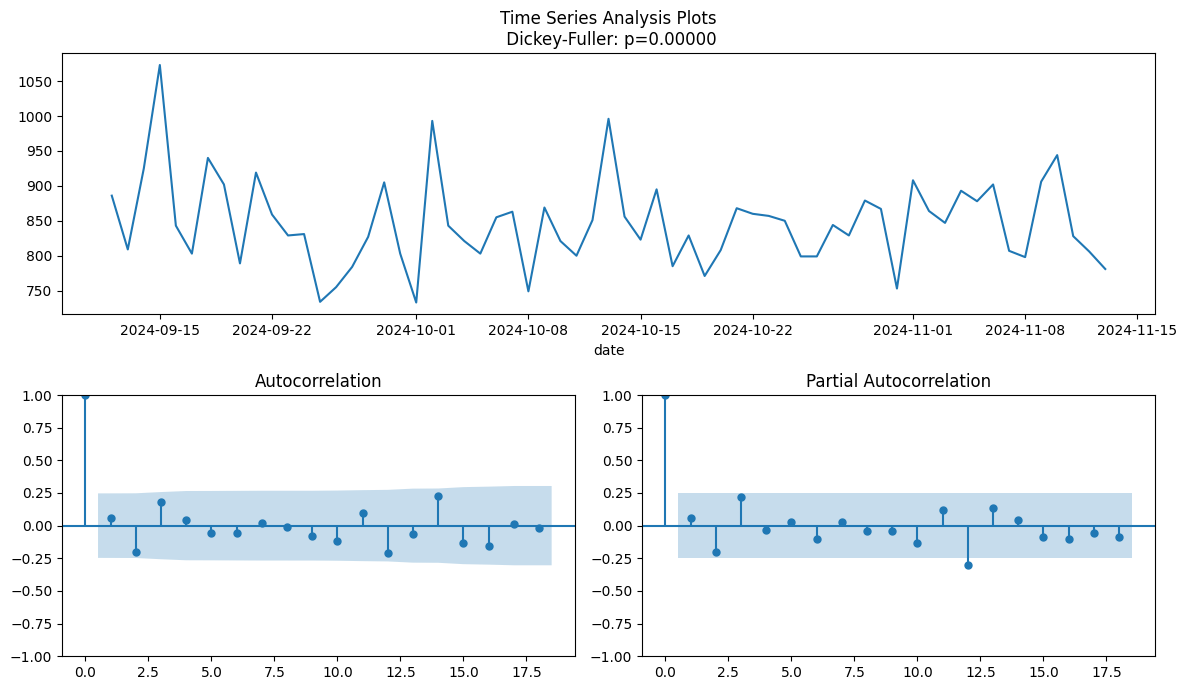

In [19]:
tsplot(daily_data['camera_1'])

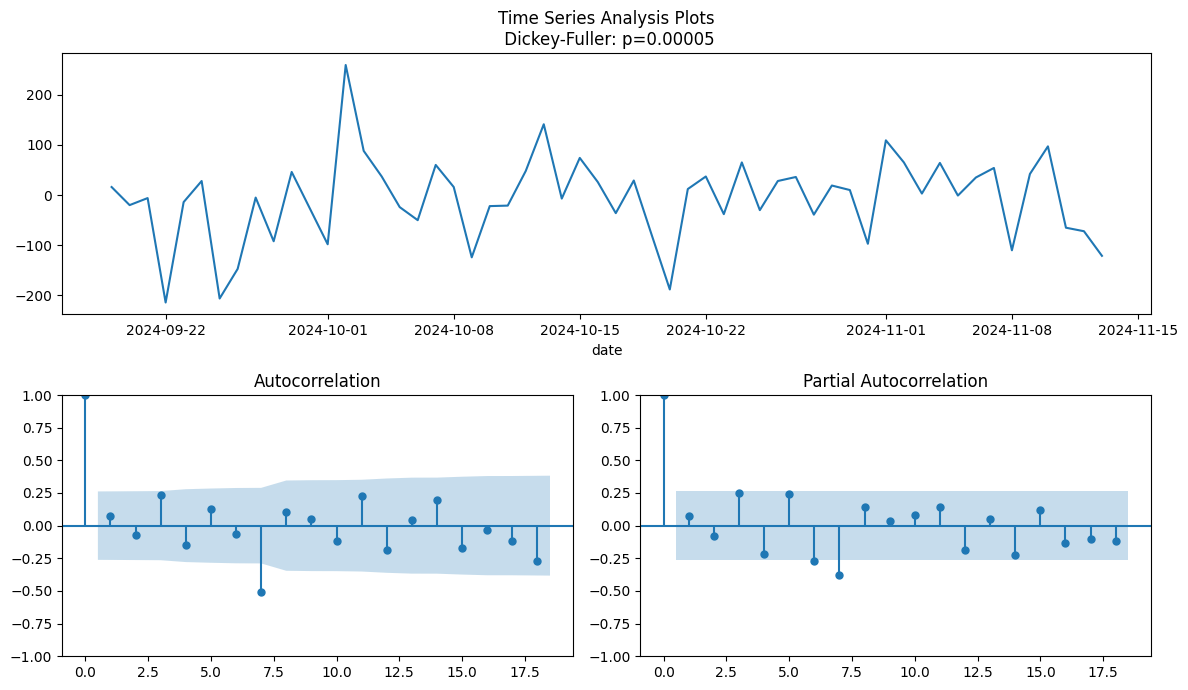

In [20]:
daily_data_diff = daily_data['camera_1'].diff(periods=7).dropna()
tsplot(daily_data_diff)

In [21]:
daily_data_with_numbers = daily_data.reset_index()
daily_data_with_numbers.drop(['date', 'camera_2'], axis=1, inplace=True)

In [22]:
forecaster = AutoARIMA(start_p=1, max_p=3)
forecaster.fit(daily_data_with_numbers)
# forecaster.summary()

AutoARIMA(max_p=3, start_p=1)

In [23]:
forecaster

AutoARIMA(max_p=3, start_p=1)

In [24]:
from sktime.forecasting.arima import ARIMA
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.base import ForecastingHorizon

# Load example data
# y = load_airline()

# Split the data into train and test sets
# y_train, y_test = temporal_train_test_split(y, test_size=36)

y = daily_data['camera_1']
daily_data.index = pd.to_datetime(daily_data.index)
y.index = daily_data.index

y_train = y[:-7]
y_test = y[-7:]

# Define the ARIMA model with p, d, q parameters
forecaster = ARIMA(order=(1, 0, 1))

# Fit the model to the training data
forecaster.fit(y_train)

# Define forecast horizon as an integer-indexed horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Predict on the test data
y_pred = forecaster.predict(fh=fh)

# Calculate performance metric
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

c:\Users\mouli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE: 0.0634329243969543


In [25]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -311.998
Date:                Sun, 27 Oct 2024   AIC                            631.996
Time:                        18:18:27   BIC                            640.097
Sample:                    09-12-2024   HQIC                           635.137
                         - 11-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    789.4274   3557.474      0.222      0.824   -6183.093    7761.948
ar.L1          0.0689      4.196      0.016      0.987      -8.155       8.293
ma.L1         -0.0222      4.209     -0.005      0.996      -8.272       8.228
sigma2      4043.4968    746.042      5.420      0.000    2581.281    5505.712
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.90
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

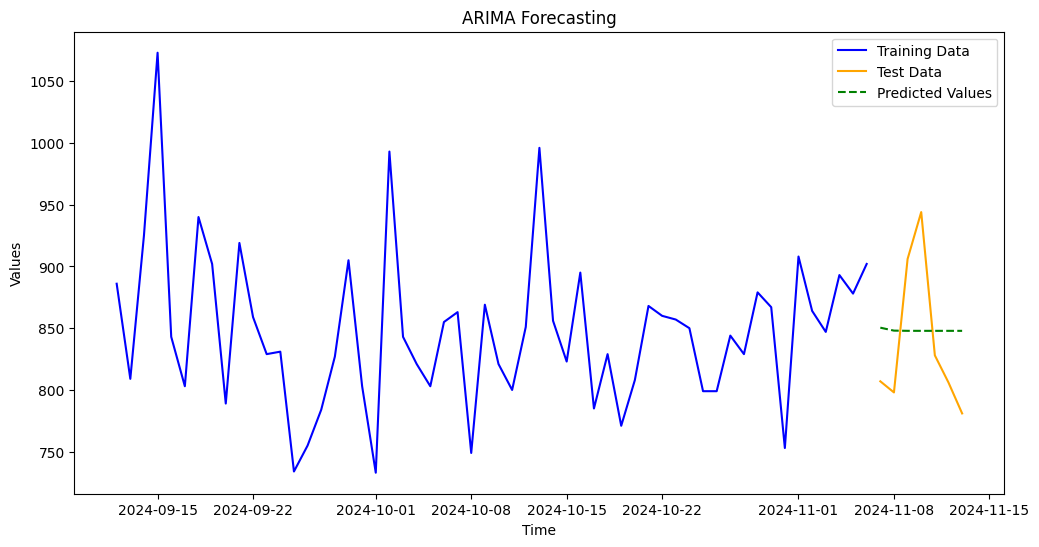

In [26]:
y_pred = forecaster.predict(fh)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Training Data', color='blue')
plt.plot(y_test, label='Test Data', color='orange')
plt.plot(y_pred, label='Predicted Values', color='green', linestyle='--')
plt.title('ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [27]:
(abs(y_pred - y_test)/7).sum()

53.756999096831336

In [28]:
y_pred

date
2024-11-07    850.420157
2024-11-08    848.034192
2024-11-09    847.869762
2024-11-10    847.858431
2024-11-11    847.857650
2024-11-12    847.857596
2024-11-13    847.857592
Name: camera_1, dtype: float64

In [29]:
y = daily_data['camera_1']

In [30]:
y_train

date
2024-09-12     886
2024-09-13     809
2024-09-14     925
2024-09-15    1073
2024-09-16     843
2024-09-17     803
2024-09-18     940
2024-09-19     902
2024-09-20     789
2024-09-21     919
2024-09-22     859
2024-09-23     829
2024-09-24     831
2024-09-25     734
2024-09-26     755
2024-09-27     784
2024-09-28     827
2024-09-29     905
2024-09-30     803
2024-10-01     733
2024-10-02     993
2024-10-03     843
2024-10-04     821
2024-10-05     803
2024-10-06     855
2024-10-07     863
2024-10-08     749
2024-10-09     869
2024-10-10     821
2024-10-11     800
2024-10-12     851
2024-10-13     996
2024-10-14     856
2024-10-15     823
2024-10-16     895
2024-10-17     785
2024-10-18     829
2024-10-19     771
2024-10-20     808
2024-10-21     868
2024-10-22     860
2024-10-23     857
2024-10-24     850
2024-10-25     799
2024-10-26     799
2024-10-27     844
2024-10-28     829
2024-10-29     879
2024-10-30     867
2024-10-31     753
2024-11-01     908
2024-11-02     864
2024-11

In [32]:
# hourly_data = timely_data.resample('H').sum()

In [34]:
# from datetime import time
# from sktime.forecasting.arima import ARIMA
# from sktime.datasets import load_airline
# from sktime.forecasting.model_selection import temporal_train_test_split
# from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# from sktime.forecasting.base import ForecastingHorizon

# # Load example data
# # y = load_airline()

# # Split the data into train and test sets
# # y_train, y_test = temporal_train_test_split(y, test_size=36)

# y = hourly_data['camera_1']
# hourly_data.index = pd.to_datetime(hourly_data.index)
# y.index = hourly_data.index

# y_train = y[:-168]
# y_test = y[-168:]

# # Define the ARIMA model with p, d, q parameters
# forecaster = ARIMA(order=(2, 0, 1))

# # Fit the model to the training data
# forecaster.fit(y_train)

# # Define forecast horizon as an integer-indexed horizon
# fh = ForecastingHorizon(y_test.index, is_relative=False)

# # Predict on the test data
# y_pred = forecaster.predict(fh=fh)

# # Calculate performance metric
# mape = mean_absolute_percentage_error(y_test, y_pred)
# print(f"MAPE: {mape}")

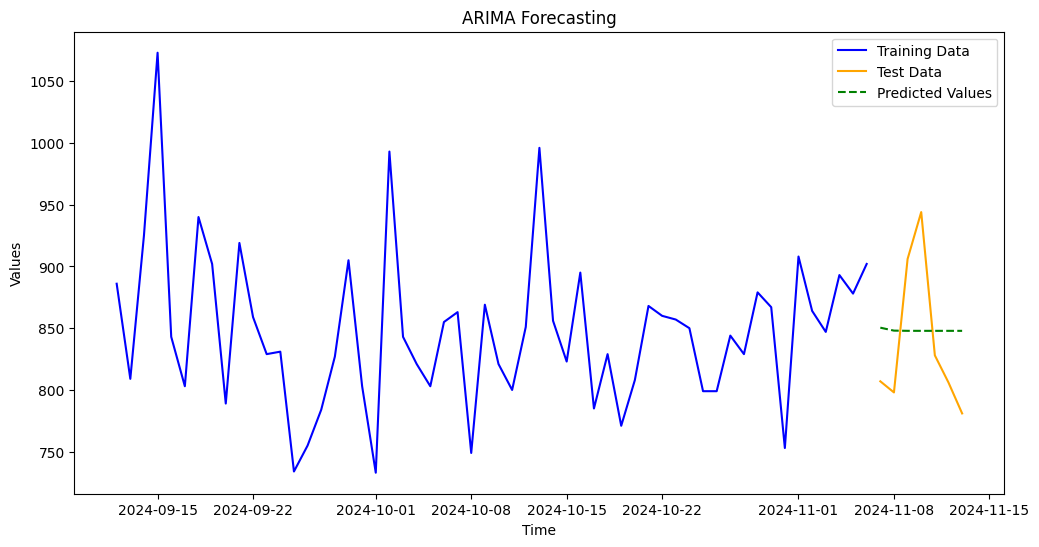

In [35]:
y_pred = forecaster.predict(fh)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Training Data', color='blue')
plt.plot(y_test, label='Test Data', color='orange')
plt.plot(y_pred, label='Predicted Values', color='green', linestyle='--')
plt.title('ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [36]:
abs(y_pred.groupby(y_pred.index.date).sum() - y_test.groupby(y_test.index.date).sum())

2024-11-07    43.420157
2024-11-08    50.034192
2024-11-09    58.130238
2024-11-10    96.141569
2024-11-11    19.857650
2024-11-12    41.857596
2024-11-13    66.857592
Name: camera_1, dtype: float64

In [37]:
abs(y_pred.groupby(y_pred.index.date).sum() - y_test.groupby(y_test.index.date).sum()).sum()/7

53.756999096831336

In [38]:
#auto arima from pmdarima

from pmdarima import auto_arima
model = auto_arima(y_train, seasonal=True, m=7, start_p=1, start_q=1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:                        SARIMAX   Log Likelihood                -312.041
Date:                Sun, 27 Oct 2024   AIC                            628.083
Time:                        18:18:58   BIC                            632.133
Sample:                    09-12-2024   HQIC                           629.653
                         - 11-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    847.8036      9.560     88.679      0.000     829.066     866.542
sigma2      4049.9436    625.645      6.473      0.000    2823.701    5276.186
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                14.79
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.89
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
model.fit(y_train)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True)

In [40]:
model.predict(n_periods=7)

2024-11-07    847.803571
2024-11-08    847.803571
2024-11-09    847.803571
2024-11-10    847.803571
2024-11-11    847.803571
2024-11-12    847.803571
2024-11-13    847.803571
Freq: D, dtype: float64

## 1b

In [41]:
data

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


In [42]:
# Find repeating vehicles in each date
new_data = data.groupby(['date', 'vehicle_no']).size().reset_index(name='count')
new_data['duration'] = data.groupby(['date', 'vehicle_no'])['time'].transform(lambda x: x.max() - x.min())

In [43]:
# data with one character difference in vehicle number in the same day
unique_dates = new_data[new_data['count'] == 1]['date'].unique()

In [44]:
# data[data['vehicle_no'].is]

In [45]:
data[data['vehicle_no'].isna()]['vehicle_no'] = 'Unknown'

C:\Users\mouli\AppData\Local\Temp\ipykernel_78164\3952432616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['vehicle_no'].isna()]['vehicle_no'] = 'Unknown'


In [46]:
na_data = data[data['vehicle_no'].isna()]

In [47]:
na_data['date'].unique()
na_data_count = na_data.groupby('date').size()

In [48]:
na_data_count

date
2024-09-14    64
2024-09-21    69
2024-09-28    42
2024-10-05    45
2024-10-12    61
2024-10-19    32
2024-10-26    35
2024-11-02    46
2024-11-09    47
dtype: int64

In [49]:
# new_data[new_data['data'] in na_data_count.index]
dates = new_data[new_data['date'].isin(na_data_count.index) & (new_data['count'] % 2 == 1)].groupby('date').size()

In [50]:
na_data[(na_data['date'] == datetime.date(2024, 9, 14)) & (na_data['camera_id'] == 1)]

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
3723,NaN,2024-09-14 09:00:00,1,2024-09-14 09:00:00,2024-09-14,1,0
3724,NaN,2024-09-14 09:00:00,1,2024-09-14 09:00:00,2024-09-14,1,0
3725,NaN,2024-09-14 09:00:00,1,2024-09-14 09:00:00,2024-09-14,1,0
3726,NaN,2024-09-14 09:00:00,1,2024-09-14 09:00:00,2024-09-14,1,0
3727,NaN,2024-09-14 09:00:00,1,2024-09-14 09:00:00,2024-09-14,1,0
...,...,...,...,...,...,...,...
3782,NaN,2024-09-14 09:20:00,1,2024-09-14 09:20:00,2024-09-14,1,0
3783,NaN,2024-09-14 09:20:00,1,2024-09-14 09:20:00,2024-09-14,1,0
3784,NaN,2024-09-14 09:20:00,1,2024-09-14 09:20:00,2024-09-14,1,0
3785,NaN,2024-09-14 09:20:00,1,2024-09-14 09:20:00,2024-09-14,1,0


In [51]:
# new_data[(new_data['date'] == datetime.date(2024, 9, 14)) & (new_data['count'] % 2 == 1) & (new_data['time'] > datetime.time(9, 20))]
# data[(data['date'] == datetime.date(2024, 9, 14)) & (data['camera'] == 2) & (data['time'] > datetime.time(9, 20))]
from pandas import Timestamp

new_new_data = pd.DataFrame()
date = dates.index[0]
data_with_vehicle_count = data.groupby(['date', 'vehicle_no']).size().reset_index(name='count')
data_with_vehicle_count = data_with_vehicle_count[(data_with_vehicle_count['date'] == date) & (data_with_vehicle_count['count'] % 2 == 1)]
data[(data['time'] > Timestamp('2024-09-14 09:20:00')) & (data['date'] == date) & (data['camera_id'] == 2) & (data['vehicle_no'].isin(data_with_vehicle_count['vehicle_no']))]

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
4521,MHFL8258,2024-09-14 16:00:00,2,2024-09-14 16:00:00,2024-09-14,0,1
4528,MHZA0097,2024-09-14 16:00:00,2,2024-09-14 16:00:00,2024-09-14,0,1
4530,MHVT1106,2024-09-14 16:00:00,2,2024-09-14 16:00:00,2024-09-14,0,1
4538,MHGB7206,2024-09-14 16:00:00,2,2024-09-14 16:00:00,2024-09-14,0,1
4545,MHQI6916,2024-09-14 16:00:00,2,2024-09-14 16:00:00,2024-09-14,0,1
...,...,...,...,...,...,...,...
4801,MHHK6075,2024-09-14 18:40:00,2,2024-09-14 18:40:00,2024-09-14,0,1
4806,MHAV1489,2024-09-14 19:00:00,2,2024-09-14 19:00:00,2024-09-14,0,1
4814,M9AB6969,2024-09-14 19:00:00,2,2024-09-14 19:00:00,2024-09-14,0,1
4940,MHTS3639,2024-09-14 20:40:00,2,2024-09-14 20:40:00,2024-09-14,0,1


In [52]:
data_dash = data.drop(data[data['date'].isin(dates.index)].index)

<Axes: xlabel='date'>

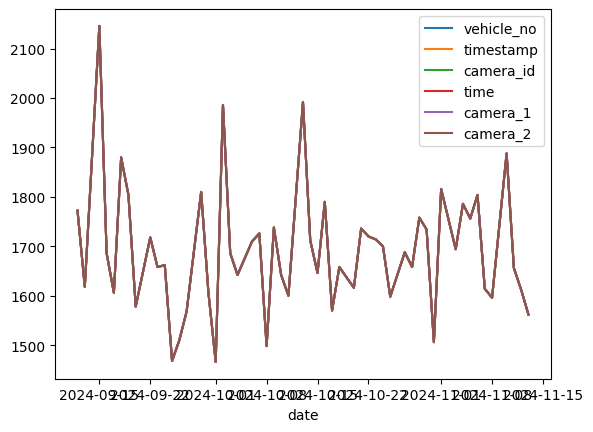

In [53]:
data_dash.groupby('date').count().plot()

In [54]:
counts = data_dash.groupby(['date', 'vehicle_no']).count()
counts[counts['camera_id'] % 2 == 1]

timestamp  camera_id  time  camera_1  camera_2
date       vehicle_no                                                
2024-09-12 MAIH5246            1          1     1         1         1
           MFQO3306            1          1     1         1         1
           MHEQ3171            1          1     1         1         1
           MHFT7338            1          1     1         1         1
           MHFT733P            1          1     1         1         1
...                          ...        ...   ...       ...       ...
2024-11-13 MHQF9456            1          1     1         1         1
           MHQF94S6            1          1     1         1         1
           MHUG3974            1          1     1         1         1
           MHZS7809            1          1     1         1         1
           YHUG3974            1          1     1         1         1

[906 rows x 5 columns]

In [55]:
from scipy.spatial.distance import pdist, squareform

# hamming distance
def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

# check if hamming distance is 1
def check_hamming_distance(s1, s2):
    return hamming_distance(s1, s2) == 1

# print(res)

In [56]:
data

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


In [57]:
na_data = data[~ data['vehicle_no'].isna()]
na_data

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


In [58]:
na_data.groupby(['date', 'time']).size()
na_dates = na_data['date'].unique()

In [59]:
data[data['date'].isin(na_dates)]



,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


In [61]:
car_data = pd.DataFrame(columns=['date', 'arrival_time', 'exit_time'])
from tqdm import tqdm
for entry in tqdm(na_data.iterrows()):
    entry = entry[1]
    # print(entry, type(entry))
    vehicle = entry['vehicle_no']
    date = entry['date']
    time = entry['time']
    camera = entry['camera_id']
    vehicle = entry['vehicle_no']
    
    if vehicle in car_data.index:
        if camera == 2:  # Assuming camera 2 is for exit
            car_data.at[vehicle, 'exit_time'] = time
        if camera == 1:
            car_data.at[vehicle, 'arrival_time'] = time
    else:
        if camera == 1:  # Assuming camera 1 is for arrival
            car_data.loc[vehicle] = [date, time, None]
        if camera == 2:
            car_data.loc[vehicle] = [date, None, time]

209it [00:00, 1115.57it/s]C:\Users\mouli\AppData\Local\Temp\ipykernel_78164\1936623831.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  car_data.loc[vehicle] = [date, None, time]
412it [00:00, 1529.67it/s]C:\Users\mouli\AppData\Local\Temp\ipykernel_78164\1936623831.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  car_data.loc[vehicle] = [date, None, time]
675it [00:00, 1958.80it/s]C:\Users\mouli\AppData\Local\Temp\ipykernel_78164\1936623831.py:21: FutureWarning: The behavior of DataFrame

In [64]:
# car_data.write_csv('car_data.csv')
car_data.to_csv('car_data.csv', index=True) 

In [62]:
print(car_data)

                date        arrival_time            exit_time
MHUN7063  2024-09-12 2024-09-12 05:00:00  2024-09-12 08:00:00
MHYN4677  2024-09-12 2024-09-12 05:00:00  2024-09-12 08:00:00
MHEL6595  2024-09-12 2024-09-12 05:00:00  2024-09-12 08:00:00
MHNQ2590  2024-09-12 2024-09-12 05:00:00  2024-09-12 08:20:00
MHHA0518  2024-09-12 2024-09-12 05:00:00                 None
...              ...                 ...                  ...
MHQJ4009  2024-11-13 2024-11-13 20:00:00  2024-11-14 00:00:00
MHPN3450  2024-11-13 2024-11-13 20:00:00  2024-11-14 00:00:00
MHBB9719  2024-11-13 2024-11-13 20:00:00  2024-11-14 00:00:00
MHLE56X9  2024-11-13                 NaT  2024-11-13 22:40:00
MHDG83S5  2024-11-13                 NaT  2024-11-13 22:40:00

[53676 rows x 3 columns]
